In [2]:
import sys 
sys.path.insert(0,"../")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from src.lddmm import Shooting
from src.kernel import VFTSGaussKernel
from src.utils import time_shape_embedding

from src.kernel import VFTSGaussKernel
from src.lddmm import Shooting
from src.utils import time_shape_embedding

In [3]:
df = pd.read_csv("./results/wellspecified.csv",index_col=0)
df = df[(df.t_amp>5)*(df.s_amp>=5)]
mean = df.groupby(["smothness","t_amp","s_amp"]).mean().r_m_e.mean()
std = df.groupby(["smothness","t_amp","s_amp"]).mean().r_m_e.std()
mx = df.groupby(["smothness","t_amp","s_amp"]).mean().r_m_e.max()

In [4]:
print(f"Mean : {mean} -- std : {std} -- max : {mx}")

Mean : 0.09348385481147221 -- std : 0.030938196772153616 -- max : 0.17434755174


In [5]:
pd.pivot_table(df,values="r_m_e",index="t_amp",columns="s_amp",aggfunc="mean")

s_amp,5,10,15,20
t_amp,,,,
10,0.069889,0.092924,0.099815,0.112105
15,0.083748,0.098995,0.110877,0.092493
20,0.092433,0.090627,0.073097,0.104803


In [5]:
df = pd.read_csv("./results/misspecified.csv",index_col=0)
df = pd.pivot_table(df,"r_v_e","t_sigma","s_sigma",aggfunc="mean")
df_s = df.style.format("{:.0e}")
print(df_s.to_latex(hrules = True, clines = "skip-last;data",multirow_align = "t"))

\begin{tabular}{lrrrr}
\toprule
s_sigma & 0.100000 & 1.000000 & 10.000000 & 100.000000 \\
t_sigma &  &  &  &  \\
\midrule
1 & 3e-02 & 3e-02 & 2e+11 & 1e-01 \\
5 & 6e-02 & 5e-03 & 5e-03 & 5e-03 \\
10 & 2e-02 & 7e-04 & 7e-04 & 6e-04 \\
50 & 1e-03 & 2e-04 & 2e-04 & 2e-04 \\
100 & 7e-04 & 2e-04 & 2e-04 & 2e-04 \\
200 & 7e-04 & 5e-04 & 2e-04 & 2e-04 \\
300 & 2e-03 & 7e-04 & 7e-04 & 7e-04 \\
\bottomrule
\end{tabular}



: 

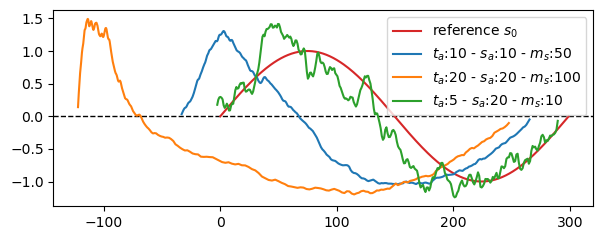

In [ ]:
from utils import Sampler
functional_signal = lambda x:  np.sin(2*np.pi*x)
q0 = time_shape_embedding(functional_signal(np.linspace(0,1,300)).reshape(-1,1),)
q0_mask = np.full_like(q0[:,:1],True).astype(bool)
Kv = VFTSGaussKernel(1,0.1,100,1,1)
shoot = Shooting(Kv)

t_lst = [
    [[10],[10],[50]],
    [[20],[20],[100]],
    [[5],[20],[10]]
]

fig,ax = plt.subplots(1,1,figsize = (6,2.5))
ax.plot(*q0.T,color="tab:red", label=r"reference $s_0$")
for lst in t_lst:
    spl = Sampler(q0,q0_mask,shoot,*lst,0)
    ps,qs,df= spl.rvs(1)
    ax.plot(*qs.T,label = r"$t_{a}$:" +f"{lst[0][0]}" r" - $s_{a}$:" + f"{lst[1][0]}" r" - $m_{s}$:" f"{lst[2][0]}")
ax.legend(fontsize=10)
ax.axhline(0,linestyle="--",color="black",zorder=0,linewidth=1)
fig.tight_layout()
fig.savefig("samples.pdf",format="pdf")
